# python中的时间类型
- python用datetime、time、date表示日期时间类型
- 年月日是日期，时分秒纳秒是时间
- 字符串与datetime类型的数据进行转化使用strftime()和strptime()
- 另外dateutil.parser可以解析各种字符串,不用输入字符串的格式，很方便
- pandas中用pd.to_datetime()把日期数组转换为DateTimeIndex类型

In [198]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
# 年，月，日，时，分，秒，6位的纳秒
dt = datetime(2018,12,20,14,51,17,800123)
dt

datetime.datetime(2018, 12, 20, 14, 51, 17, 800123)

In [215]:
# 用date()和time()获取date对象和time对象
dt.date()

datetime.date(2018, 12, 20)

In [216]:
dt.time()

datetime.time(14, 51, 17, 800123)

In [218]:
#对datetime对象获取年
dt.year

2018

#### 字符串与datetime类型的进行转化

In [220]:
dt_str = dt.strftime('%Y-%m-%d %H:%M:%S')

In [225]:
datetime.strptime(dt_str,'%Y-%m-%d %H:%M:%S')

datetime.datetime(2018, 12, 20, 14, 51, 17)

In [227]:
from dateutil import parser
parser.parse(dt_str)

datetime.datetime(2018, 12, 20, 14, 51, 17)

#### pandas中的时间转化

In [232]:
dates = ['2018-12-2','2018-12-7','2018-12-10',None]

In [233]:
pd.to_datetime(dates)

DatetimeIndex(['2018-12-02', '2018-12-07', '2018-12-10', 'NaT'], dtype='datetime64[ns]', freq=None)

### 时间序列基础
- pandas中的基础时间序列种类是由时间戳索引的Series,在pandas外部则通常表示为Python字符串或datetime对象

In [21]:
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,18)]

In [22]:
# 用datetime类型的数据作为index，可以直接画图
ts = pd.Series(np.random.randn(6),index=dates)

In [23]:
ts

2011-01-02   -0.680745
2011-01-05   -1.048687
2011-01-07    0.149775
2011-01-08    1.030204
2011-01-10   -0.237503
2011-01-18   -0.800470
dtype: float64

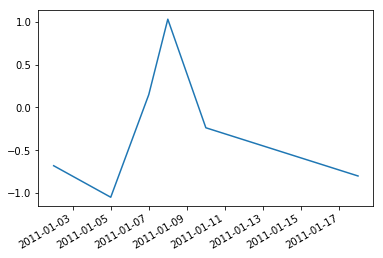

In [29]:
# 可以看出来x轴是时间索引，按两天一个刻度，即使中间没有数据也会有，与正常数字轴是一样的
ts.plot()
plt.show()

In [32]:
# pandas使用numpy的datetime64数据类型，是在纳秒级别的分辨率下存储时间戳
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-18'],
              dtype='datetime64[ns]', freq=None)

In [33]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

In [35]:
# 在ts中每隔一个元素选择一个
ts[::2]

2011-01-02   -0.680745
2011-01-07    0.149775
2011-01-10   -0.237503
dtype: float64

#### 索引、选择、子集

In [39]:
ts

2011-01-02   -0.680745
2011-01-05   -1.048687
2011-01-07    0.149775
2011-01-08    1.030204
2011-01-10   -0.237503
2011-01-18   -0.800470
dtype: float64

In [38]:
stamp = ts.index[2]
ts[stamp]

0.14977518628900047

In [44]:
# 为了方便还可以传递一个能解释为日期的字符串,以下三个都可以
ts['2011-01-18']

-0.8004696353568121

In [45]:
ts['1/18/2011']

-0.8004696353568121

In [46]:
ts['20110118']

-0.8004696353568121

In [47]:
# 对于一个时间段可以传递一个年份或月份进行索引

In [48]:
long_ts = pd.Series(np.random.randn(1000),index=pd.date_range('2000-01-01',periods=1000))

In [50]:
long_ts.shape

(1000,)

In [52]:
# 选择2000-1一个月份的数据
long_ts['2000-1']

2000-01-01    0.790614
2000-01-02    0.294810
2000-01-03    2.017097
2000-01-04    0.885727
2000-01-05   -0.502146
2000-01-06   -0.786536
2000-01-07    0.501736
2000-01-08   -0.506227
2000-01-09   -0.444971
2000-01-10    1.845453
2000-01-11    0.852259
2000-01-12    0.412973
2000-01-13   -0.012491
2000-01-14    0.266584
2000-01-15    0.574358
2000-01-16    1.223815
2000-01-17   -0.596830
2000-01-18   -2.009795
2000-01-19    1.634978
2000-01-20    0.463485
2000-01-21    0.455659
2000-01-22    0.078668
2000-01-23    0.301951
2000-01-24   -1.556267
2000-01-25    0.067397
2000-01-26   -2.964065
2000-01-27    0.918646
2000-01-28    1.394249
2000-01-29    0.854412
2000-01-30   -0.141541
2000-01-31   -0.201151
Freq: D, dtype: float64

In [55]:
# 选取2001.2月之后的数据
long_ts['2001-02':]

2001-02-01    0.771859
2001-02-02    0.500317
2001-02-03    0.961536
2001-02-04    1.090490
2001-02-05    1.407112
2001-02-06   -1.255434
2001-02-07   -0.638237
2001-02-08    0.160011
2001-02-09   -0.402866
2001-02-10   -0.644675
2001-02-11   -0.848494
2001-02-12    1.362484
2001-02-13    0.570178
2001-02-14   -0.937460
2001-02-15    0.379093
2001-02-16    1.477222
2001-02-17    0.650955
2001-02-18   -2.053561
2001-02-19   -1.138854
2001-02-20    1.075871
2001-02-21   -0.667576
2001-02-22   -0.356429
2001-02-23    0.047868
2001-02-24    0.110294
2001-02-25   -0.667512
2001-02-26    1.115981
2001-02-27   -0.110816
2001-02-28    0.010990
2001-03-01    0.206113
2001-03-02   -0.724045
                ...   
2002-08-28    0.348873
2002-08-29   -1.473925
2002-08-30   -0.007023
2002-08-31   -0.038882
2002-09-01   -0.541788
2002-09-02    0.170915
2002-09-03    0.699993
2002-09-04   -1.402216
2002-09-05    1.527177
2002-09-06    0.064232
2002-09-07   -1.091649
2002-09-08   -0.023396
2002-09-09 

In [60]:
# 使用datetime对象进行切片操作
long_ts[datetime(2002,9,20,20):datetime(2002,9,26)]

2002-09-21   -0.630057
2002-09-22   -0.757929
2002-09-23   -0.253052
2002-09-24   -1.854116
2002-09-25   -0.958163
2002-09-26    1.236338
Freq: D, dtype: float64

In [61]:
long_ts[datetime(2002,9,20):datetime(2002,9,26)]

2002-09-20   -1.784708
2002-09-21   -0.630057
2002-09-22   -0.757929
2002-09-23   -0.253052
2002-09-24   -1.854116
2002-09-25   -0.958163
2002-09-26    1.236338
Freq: D, dtype: float64

#### 重复索引的处理，用聚合去重
- 用is_unique()来判断是否有重复
- 用groupby(level=0)进行聚合，再用mean()求平均进行去重

In [64]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])

In [65]:
dup_ts = pd.Series(np.arange(5),index=dates)

In [66]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [67]:
dup_ts.index.is_unique

False

In [76]:
# 根据时间进行聚合
grouped = dup_ts.groupby(level=0)

In [77]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [78]:
df = grouped.mean()

In [79]:
df

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [80]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

### 日期范围，频率及移位
- 日期范围是通过date_range()函数生成的，默认情况下是包含头也包含尾的，参数periods表示序列的长度，参数freq传入频率
- 频率也可以自定义

In [86]:
pd.date_range(start='2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### 区间操作和区间算术
- Period表示一个时间区间

In [92]:
p = pd.Period('2007',freq='A-DEC')
p

Period('2007', 'A-DEC')

In [96]:
# period_range构造区间序列，可以用作索引
rng = pd.period_range('2000-01-01','2000-06-30',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [97]:
pd.Series(np.random.randn(6),index=rng)

2000-01   -0.791686
2000-02   -0.460861
2000-03    0.518197
2000-04   -0.518104
2000-05   -1.131252
2000-06    0.143811
Freq: M, dtype: float64

#### 将时间戳转化为区间（及逆转化）

In [98]:
rng = pd.date_range('2000-01-01',periods=3,freq='M')

In [100]:
ts = pd.Series(np.random.randn(3),index=rng)

In [101]:
ts

2000-01-31   -1.406944
2000-02-29   -0.623858
2000-03-31    0.257232
Freq: M, dtype: float64

In [105]:
# 默认情况下根据时间戳推断出新PeriodIndex的频率
ts.to_period()

2000-01   -1.406944
2000-02   -0.623858
2000-03    0.257232
Freq: M, dtype: float64

In [109]:
rng = pd.date_range('1/29/2000',periods=6,freq='D')
ts2 = pd.Series(np.random.randn(6),index=rng)
ts2

2000-01-29    0.326366
2000-01-30    0.943313
2000-01-31    1.202657
2000-02-01    0.489955
2000-02-02   -0.338194
2000-02-03   -2.292190
Freq: D, dtype: float64

In [113]:
ts3 = ts2.to_period('M')
ts3 

2000-01    0.326366
2000-01    0.943313
2000-01    1.202657
2000-02    0.489955
2000-02   -0.338194
2000-02   -2.292190
Freq: M, dtype: float64

In [120]:
# 把转化为区间的数据聚合，并把平均值作为区间的大小
grouped_ts3 = ts3.groupby(level=0)
grouped_ts3.mean()

2000-01    0.824112
2000-02   -0.713476
Freq: M, dtype: float64

In [124]:
ts3

2000-01    0.326366
2000-01    0.943313
2000-01    1.202657
2000-02    0.489955
2000-02   -0.338194
2000-02   -2.292190
Freq: M, dtype: float64

In [129]:
# 逆运算并不好用，回来的index是每个月的第一天
ts3.to_timestamp()

2000-01-01    0.326366
2000-01-01    0.943313
2000-01-01    1.202657
2000-02-01    0.489955
2000-02-01   -0.338194
2000-02-01   -2.292190
dtype: float64

### 重新采样与频率转换
pandas对象的resample()

In [139]:
rng = pd.date_range('2000-01-01',periods=100,freq='1d')

In [144]:
ts = pd.Series(np.arange(1,101,1),index=rng)
ts

2000-01-01      1
2000-01-02      2
2000-01-03      3
2000-01-04      4
2000-01-05      5
2000-01-06      6
2000-01-07      7
2000-01-08      8
2000-01-09      9
2000-01-10     10
2000-01-11     11
2000-01-12     12
2000-01-13     13
2000-01-14     14
2000-01-15     15
2000-01-16     16
2000-01-17     17
2000-01-18     18
2000-01-19     19
2000-01-20     20
2000-01-21     21
2000-01-22     22
2000-01-23     23
2000-01-24     24
2000-01-25     25
2000-01-26     26
2000-01-27     27
2000-01-28     28
2000-01-29     29
2000-01-30     30
             ... 
2000-03-11     71
2000-03-12     72
2000-03-13     73
2000-03-14     74
2000-03-15     75
2000-03-16     76
2000-03-17     77
2000-03-18     78
2000-03-19     79
2000-03-20     80
2000-03-21     81
2000-03-22     82
2000-03-23     83
2000-03-24     84
2000-03-25     85
2000-03-26     86
2000-03-27     87
2000-03-28     88
2000-03-29     89
2000-03-30     90
2000-03-31     91
2000-04-01     92
2000-04-02     93
2000-04-03     94
2000-04-04

In [156]:
# 如果不指定kind='peroid'，默认结果的index类型是不变的，index类型有两种：DateTimeIndex和PeroidIndex两种
ts.resample('M').sum()

2000-01-31     496
2000-02-29    1334
2000-03-31    2356
2000-04-30     864
Freq: M, dtype: int64

In [152]:
ts.resample('M',kind='period').sum()

2000-01     496
2000-02    1334
2000-03    2356
2000-04     864
Freq: M, dtype: int64

### 向上采样

In [157]:
frame = pd.DataFrame(np.random.randn(2,4),index=pd.date_range('1/1/2000',periods=2,freq='W-WED'))

In [158]:
frame

,0,1,2,3
2000-01-05,0.144973,-0.918557,-0.777650,1.612424
2000-01-12,0.978193,1.320366,0.184006,0.177047


In [163]:
# 把低频转换为高频
frame2 = frame.resample('D').asfreq()
frame2

,0,1,2,3
2000-01-05,0.144973,-0.918557,-0.777650,1.612424
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.978193,1.320366,0.184006,0.177047


In [162]:
frame2.index

DatetimeIndex(['2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12'],
              dtype='datetime64[ns]', freq='D')

In [168]:
frame2.fillna(value=0)

,0,1,2,3
2000-01-05,0.144973,-0.918557,-0.777650,1.612424
2000-01-06,0.000000,0.000000,0.000000,0.000000
2000-01-07,0.000000,0.000000,0.000000,0.000000
2000-01-08,0.000000,0.000000,0.000000,0.000000
2000-01-09,0.000000,0.000000,0.000000,0.000000
2000-01-10,0.000000,0.000000,0.000000,0.000000
2000-01-11,0.000000,0.000000,0.000000,0.000000
2000-01-12,0.978193,1.320366,0.184006,0.177047


### 滑动窗口函数

In [185]:
close_px_all = pd.read_csv('./pydata_analysis_book/pydata-book/examples/stock_px_2.csv',parse_dates=True,index_col=0)

In [186]:
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [187]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

In [188]:
close_px = close_px.resample('B').ffill()

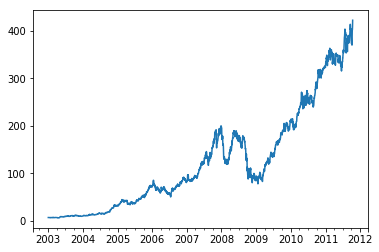

In [195]:
close_px.AAPL.plot()

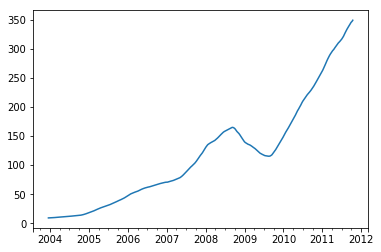

In [196]:
close_px.AAPL.rolling(250).mean().plot()

In [197]:
np.*load*?